Thomas Koutsidis

# 1.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('faithful.csv')

In [3]:
df

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [4]:
faithful_values = df[["eruptions", "waiting"]].values

In [5]:
k = 4

In [6]:
def kmeans(data, k, max_iterations = 10):
    centroid = data[np.random.choice(data.shape[0], k, replace = False)]
    for i in range(max_iterations):
        location = np.linalg.norm(data[:, None] - centroid, axis = 2)
        label = np.argmin(location, axis = 1)
        centroid_2 = np.array([data[label == i].mean(axis = 0) for i in range(k)])
        if np.all(centroid == centroid_2):
            break
        centroid = centroid_2
    return label, centroid

# Resources used:
# https://www.ibm.com/docs/en/spss-statistics/beta?topic=analysis-k-means-cluster-convergence-criteria
# https://numpy.org/doc/stable/reference/routines.linalg.html
# https://pythonprogramming.net/k-means-from-scratch-2-machine-learning-tutorial/
# https://www.youtube.com/watch?v=6UF5Ysk_2gk
# https://numpy.org/doc/stable/reference/generated/numpy.argmin.html

In [7]:
label, centroid = kmeans(faithful_values, k)

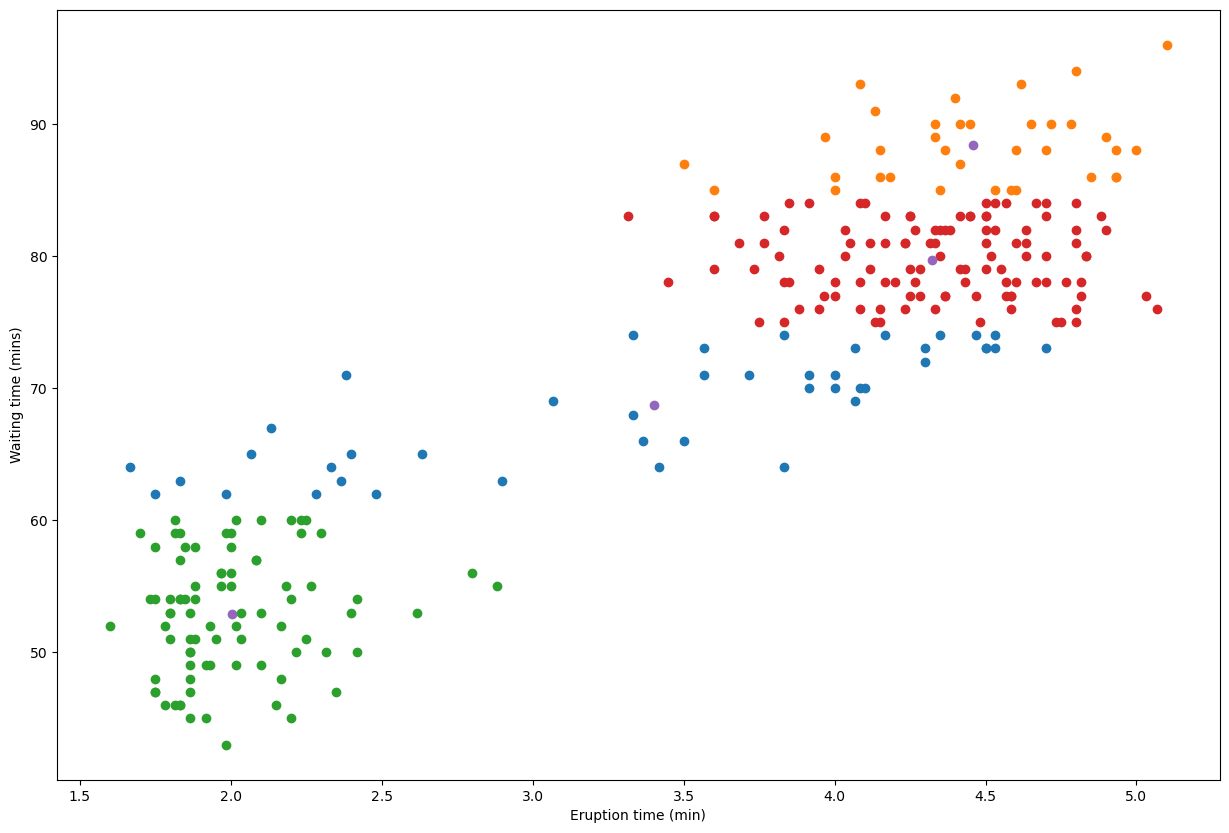

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))

for i in range(k):
    datapoints = faithful_values[label == i]
    plt.scatter(datapoints[:, 0], datapoints[:, 1])

plt.scatter(centroid[:, 0], centroid[:, 1])
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time (mins)')
plt.show()

# 2.

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Resources used:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm,'\n')
accuracy = accuracy_score(y_test, y_pred)
accuracy = round(accuracy, 2)
print("Accuracy score:", accuracy)

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Accuracy score: 0.02


In [15]:
print(y_pred)

[78 46 78 54 81 78 78 78 78 81 54 78 78 54 78 62 62 54 78 78 78 54 81 54
 78 78 54 81 54 81 78 54 78 78 78 78 81 54 54 81 78 78 54 78 78 78 78 78
 54 78 46 54 59 54 54]


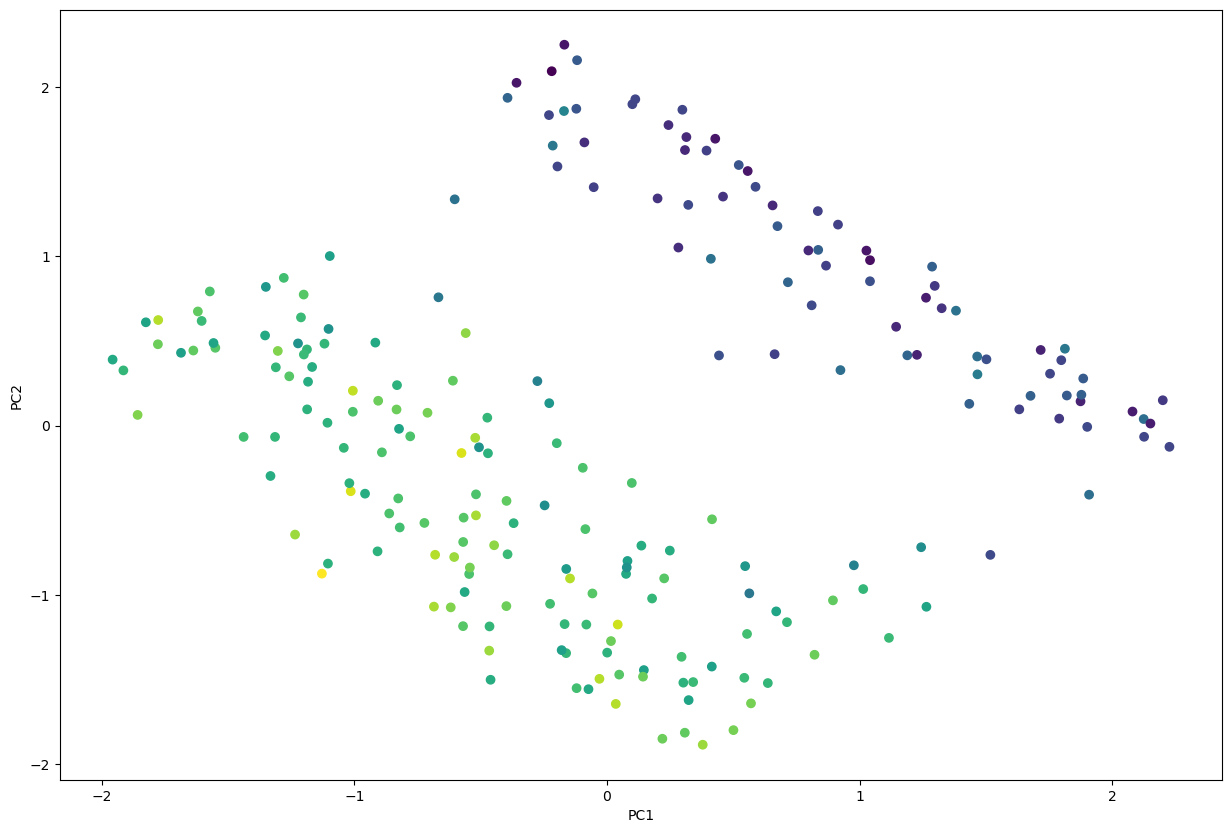

In [16]:
plt.figure(figsize = (15, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()